# Inaugural Project 2024



**Table of contents**<a id='toc0_'></a>    
- 1. [Imports](#toc1_)    
- 2. [Model class](#toc2_)
- 3. [Questions](#toc3_)
	- 3.1 [Question 1](#toc3_1_)
	- 3.2 [Question 2](#toc3_2_)
	- 3.3 [Question 3](#toc3_3_)
	- 3.4 [Question 4](#toc3_4_)
	- 3.4.1 [Question 4a](#toc3_4_1_) 
	- 3.4.2 [Question 4b](#toc3_4_2_)  
	- 3.5 [Question 5](#toc3_5_)
	- 3.5.1 [Question 5a](#toc3_5_1_)    
	- 3.5.2 [Question 5b](#toc3_5_2_)       
	- 3.6 [Question 6](#toc3_6_)
	- 3.6.1 [Question 6a](#toc3_6_1_)  
	- 3.6.2 [Question 6b](#toc3_6_2_) 
	- 3.7 [Question 7](#toc3_7_)
	- 3.8 [Question 8](#toc3_8_)

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Imports](#toc0_)

In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

import numpy as np

from inauguralproject import InauguralProjectClass

# Import optimize and minimize from scipy for question 5
from scipy import optimize
from scipy.optimize import minimize

# Import for question 7
from scipy.optimize import fsolve

## 2. <a id='toc2_'></a>[Model class](#toc0_)

In [2]:
model = InauguralProjectClass()


### 3. <a id='toc2_1_'></a>[Answers to questions](#toc0_)

### 3.1. <a id='toc3_1_'></a>[Question 1](#toc0_)

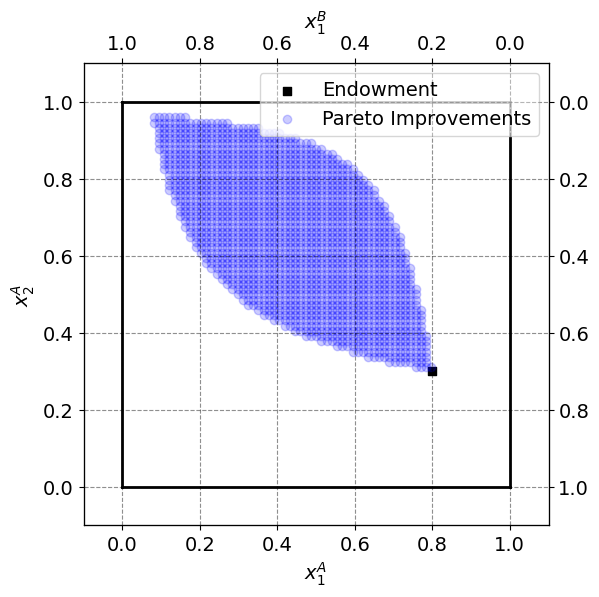

In [3]:
# Initialize model
par = model.par

# We calculate the initial utilities
U_A_initial = model.utility_A(par.w1A, par.w2A)
U_B_initial = model.utility_B(par.w1B, par.w2B)

# Generate grid for x1A and x2A
N = 75
x1A_vals = np.linspace(0, 1, N)
x2A_vals = np.linspace(0, 1, N)
x1A_grid, x2A_grid = np.meshgrid(x1A_vals, x2A_vals)

# Pareto improvements grid
pareto_improvements = np.zeros(x1A_grid.shape, dtype=bool)

# Checking for Pareto improvements
for i in range(N):
    for j in range(N):
        x1A = x1A_grid[i,j]
        x2A = x2A_grid[i,j]
        x1B = 1 - x1A
        x2B = 1 - x2A
        if model.utility_A(x1A, x2A) >= U_A_initial and model.utility_B(x1B, x2B) >= U_B_initial:
            pareto_improvements[i,j] = True

# Plotting setup (using the given code for a basic Edgeworth box)
fig, ax_A = plt.subplots(figsize=(6, 6), dpi=100)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

ax_B = ax_A.twinx().twiny()
ax_B.set_ylabel("$x_2^B$")
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A's endowment
ax_A.scatter(par.w1A, par.w2A, marker='s', color='black', label='Endowment')

# Pareto improvements
ax_A.scatter(x1A_grid[pareto_improvements], x2A_grid[pareto_improvements], color='blue', alpha=0.2, label='Pareto Improvements')

# Limits
w1bar, w2bar = 1.0, 1.0
ax_A.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_A.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

# Relocate the legend
ax_A.legend(frameon=True, loc='upper right')

plt.show()

### 3.2. <a id='toc3_2_'></a>[Question 2](#toc0_)

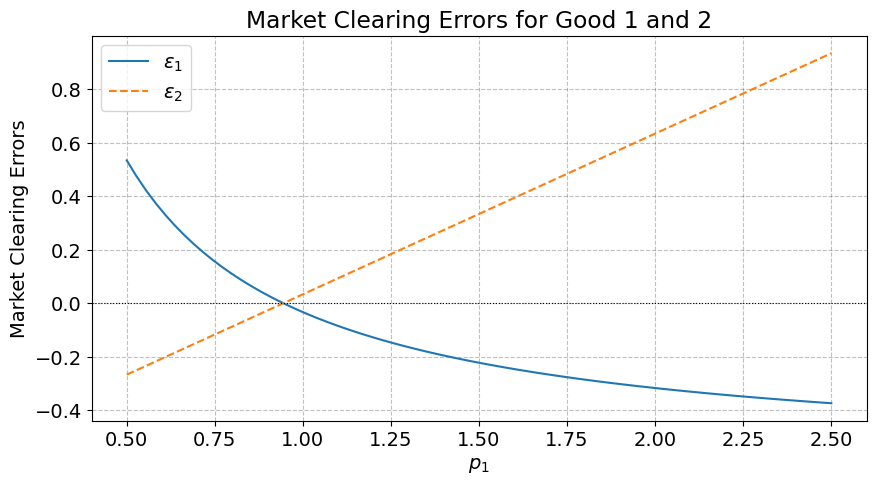

In [4]:
eps1_values = []
eps2_values = []

# Given the information from the question, we set up the range from 0.5 to 2.5 with N = 75
p1_values = np.linspace(0.5, 2.5, 75)

for p1 in p1_values:
    eps1, eps2 = model.check_market_clearing(p1)
    eps1_values.append(eps1)
    eps2_values.append(eps2)
    
# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(p1_values, eps1_values, label='$\epsilon_1$')
plt.plot(p1_values, eps2_values, label='$\epsilon_2$', linestyle='--')
plt.axhline(0, color='black', linewidth=0.8, linestyle=':')
plt.xlabel('$p_1$')
plt.ylabel('Market Clearing Errors')
plt.legend()
plt.title('Market Clearing Errors for Good 1 and 2')
plt.show()


### 3.3. <a id='toc3_3_'></a>[Question 3](#toc0_)

In [5]:
# We define the function that calculates the market-clearing error
def market_clearing_error(p1, model):
    eps1, eps2 = model.check_market_clearing(p1)
    return np.abs(eps1)

# Initial guess for p1
initial_guess = 0.5  # Adjust this based on your expected range

# We perform the optimization
result = minimize(market_clearing_error, initial_guess, args=(model,), method='Nelder-Mead')

# We extract the market-clearing price
market_clearing_price = result.x[0]

print(f"The market clearing price p1 is {market_clearing_price:.4f}")

The market clearing price p1 is 0.9444


### 3.4. <a id='toc3_4_'></a>[Question 4](#toc0_)

### 3.4.1. <a id='toc3_4_1_'></a>[Question 4a](#toc0_)

In [6]:
def objective_function_q4(p1, model):
    # We calculate demands for consumer B at this p1
    x1B, x2B = model.demand_B(p1)
    
    # We calculate utility for A given these new endowments
    utility_A = model.utility_A(1 - x1B, 1 - x2B)
    
    # We check for invalid values
    if 1 - x1B <= 0 or 1 - x2B <= 0:
        return np.inf  # Return a large number to indicate invalid utility
    
    # Since we are using a minimizer, we return the negative utility to maximize it
    return -utility_A


# We generate the set of p1 values
N = 100  # Number of intervals
p1_values = np.linspace(0.5, 2.5, N)

# We list to store utility values for each p1
utilities = []

# We iterate over each p1 value to find the corresponding utility
for p1 in p1_values:
    utility = -objective_function_q4(p1, model)  # Get the utility (negate the result to get the actual utility)
    utilities.append(utility)

# We find the p1 value that maximizes utility
max_utility_index = np.argmax(utilities)
optimal_p1 = p1_values[max_utility_index]
max_utility = utilities[max_utility_index]

print(f"The optimal value of p1 is {optimal_p1:.4f} and the maximum utility for consumer A is {max_utility:.4f}")


The optimal value of p1 is 1.8939 and the maximum utility for consumer A is 0.6336


/Users/thomaskalving/Desktop/projects-2024-tbm527/inauguralproject/inauguralproject.py:23: RuntimeWarning: invalid value encountered in scalar power
  return x1A**self.par.alpha * x2A**(1-self.par.alpha)


### 3.4.2. <a id='toc3_4_1_'></a>[Question 4b](#toc0_)

In [7]:
# Initial guess for p1
initial_guess_4b = 1.0  # Adjust this based on your expected range

# We perform the optimization
result = minimize(objective_function_q4, initial_guess_4b, args=(model,), method='Nelder-Mead', bounds=[(1e-5, None)])

# We extract the optimal p1 and the maximum utility for consumer A
optimal_p1 = result.x[0]
max_utility = -result.fun  # We negate the result to get the actual maximum utility

print(f"The optimal value of p1 is {optimal_p1:.4f} and the maximum utility for consumer A is {max_utility:.4f}")


The optimal value of p1 is 1.8993 and the maximum utility for consumer A is 0.6336


### 3.5. <a id='toc3_5_'></a>[Question 5](#toc0_)

### 3.5.1 <a id='toc3_5_1_'></a>[Question 5a](#toc0_)

In [8]:
# Function to evaluate if a point meets the constraints
def objective_5a(x1A, x2A, model, U_A_initial, U_B_initial):
    if model.utility_A(x1A, x2A) < U_A_initial:
        return False
    if model.utility_B(1 - x1A, 1 - x2A) < U_B_initial:
        return False
    return True

# Evaluate the utility for all feasible points
optimal_x1A, optimal_x2A = None, None
max_utility_A = -np.inf

for x1A in x1A_vals:
    for x2A in x2A_vals:
        if objective_5a(x1A, x2A, model, U_A_initial, U_B_initial):
            utility_A = model.utility_A(x1A, x2A)
            if utility_A > max_utility_A:
                max_utility_A = utility_A
                optimal_x1A, optimal_x2A = x1A, x2A

if optimal_x1A is not None and optimal_x2A is not None:
    print(f"The optimal allocation for consumer A is x1A = {optimal_x1A:.4f} and x2A = {optimal_x2A:.4f} which yields the utility {max_utility_A:.4f}")
else:
    print("The optimization was not successful.")


The optimal allocation for consumer A is x1A = 0.5811 and x2A = 0.8378 which yields the utility 0.7416


### 3.5.2. <a id='toc3_5_2_'></a>[Question 5b](#toc0_)

In [9]:
# We set the optimization objective
def objective_5b(x):
    return -model.utility_A(*x)

# Update the constraints to focus on consumer B not being worse off
constraints_5b = [
    {'type': 'ineq', 'fun': lambda x: model.utility_B(1-x[0], 1-x[1]) - U_B_initial} # B is not worse off
]

# Bounds for x1A and x2A
bounds_5b = [(0, 1), (0, 1)]

# Initial guess for the allocation
initial_guess_5b = [par.w1A, par.w2A]

# Perform the optimization with the updated constraint
result = minimize(objective_5b, initial_guess_5b, bounds=bounds_5b, constraints=constraints_5b)

if result.success:
    optimal_x1A, optimal_x2A = result.x
    optimal_utility_A = -result.fun # Converting back to positive for utility
    print(f"The optimal allocation for A under 5b is x1 = {optimal_x1A:.4f} and x2 = {optimal_x2A:.4f}")
    print(f"The maximized utility for A under 5b is {model.utility_A(optimal_x1A, optimal_x2A):.4f}")
else:
    print("Optimization was unsuccessful under 5b")
    

The optimal allocation for A under 5b is x1 = 0.5757 and x2 = 0.8444
The maximized utility for A under 5b is 0.7432


### 3.6. <a id='toc3_5_2_'></a>[Question 6](#toc0_)

### 3.6.1. <a id='toc3_5_2_'></a>[Question 6a](#toc0_)

In [10]:
# We set the optimization objective
def objective_6a(x):
    # Compute utilities for both A and B given an allocation for A
    utility_A_6a = model.utility_A(x[0], x[1])
    utility_B_6b = model.utility_B(1-x[0], 1-x[1])
    return -(utility_A_6a + utility_B_6b)

bounds_6a = [(0,1), (0,1)]

initial_guess_6a = [0.5, 0.5]

result = minimize(objective_6a, initial_guess_6a, method='SLSQP', bounds=bounds_6a)


if result.success:
    optimal_x1A, optimal_x2A = result.x
    optimal_utility = -result.fun  # Convert back to positive for the total utility
    print(f"The optimal allocation for aggregate utility is x1A = {optimal_x1A: .4f} and x2A = {optimal_x2A: .4f}")
    print(f"The aggregate utility is {optimal_utility: .4f}")
else:
    print("Optimization was not successful")


The optimal allocation for aggregate utility is x1A =  0.3334 and x2A =  0.6666
The aggregate utility is  1.0583


### 3.6.2. <a id='toc3_5_2_'></a>[Question 6b](#toc0_)

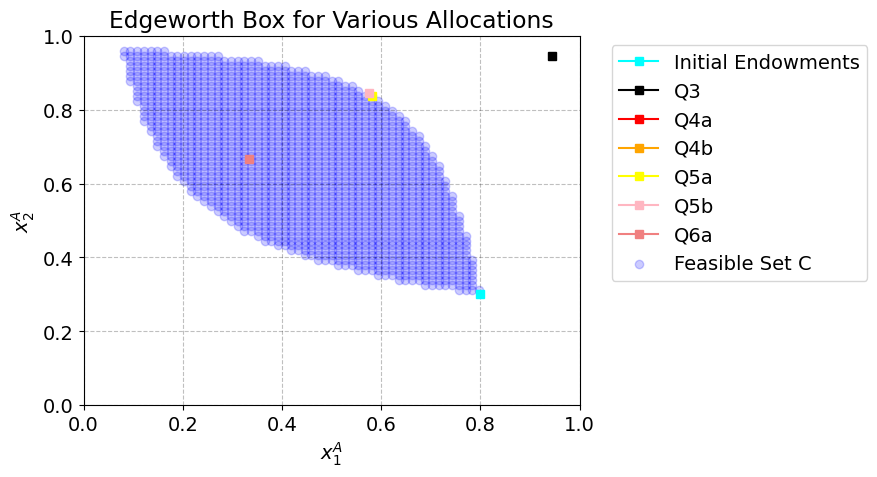

In [11]:
# Function to evaluate if a point meets the constraints
def obective_6b(x1A, x2A, model, U_A_initial, U_B_initial):
    if model.utility_A(x1A, x2A) < U_A_initial:
        return False
    if model.utility_B(1 - x1A, 1 - x2A) < U_B_initial:
        return False
    return True

# Create a list to store the feasible points in set C
feasible_points_C = []

for x1A in x1A_vals:
    for x2A in x2A_vals:
        if obective_6b(x1A, x2A, model, U_A_initial, U_B_initial):
            feasible_points_C.append((x1A, x2A))

# Convert to numpy array for easier plotting
feasible_points_C = np.array(feasible_points_C)

# Placeholder for optimal allocations from previous questions
optimal_allocation_q3 = [0.9444, 0.9444]  
optimal_allocation_q4a = [1.8939, 0.6336]  
optimal_allocation_q4b = [1.8993 , 0.6336]  
optimal_allocation_q5a = [0.5811, 0.8378] 
optimal_allocation_q5b = [0.5757, 0.8444] 

# Assume this holds the optimal allocation from question 6a
optimal_allocation_q6a = [optimal_x1A, optimal_x2A]

# Initial endowments
omega_A_initial = [0.8, 0.3]
omega_B_initial = [1 - omega_A_initial[0], 1 - omega_A_initial[1]]

fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel('$x_1^A$')
ax.set_ylabel('$x_2^A$')
ax.set_title('Edgeworth Box for Various Allocations')

# Plotting initial endowments
ax.plot(omega_A_initial[0], omega_A_initial[1], marker='s', color='aqua', label="Initial Endowments")

# Plotting allocations from questions 3 to 5
ax.plot(optimal_allocation_q3[0], optimal_allocation_q3[1], marker='s', color='black', label='Q3')
ax.plot(optimal_allocation_q4a[0], optimal_allocation_q4a[1], marker='s',color='red',label='Q4a')
ax.plot(optimal_allocation_q4b[0], optimal_allocation_q4b[1], marker='s', color='orange', label='Q4b')
ax.plot(optimal_allocation_q5a[0], optimal_allocation_q5a[1], marker='s', color='yellow', label='Q5a')
ax.plot(optimal_allocation_q5b[0], optimal_allocation_q5b[1], marker='s', color='lightpink', label='Q5b')

# Plotting the allocation from question 6a
ax.plot(optimal_allocation_q6a[0], optimal_allocation_q6a[1], marker='s', color='lightcoral', label='Q6a')

# Plotting feasible points from set C
if feasible_points_C.size > 0:
    ax.scatter(feasible_points_C[:, 0], feasible_points_C[:, 1], color='blue', alpha=0.2, label='Feasible Set C')

ax.legend(loc='upper right', bbox_to_anchor=(1.6, 1.0))
plt.show()


### 3.7. <a id='toc3_5_2_'></a>[Question 7](#toc0_)

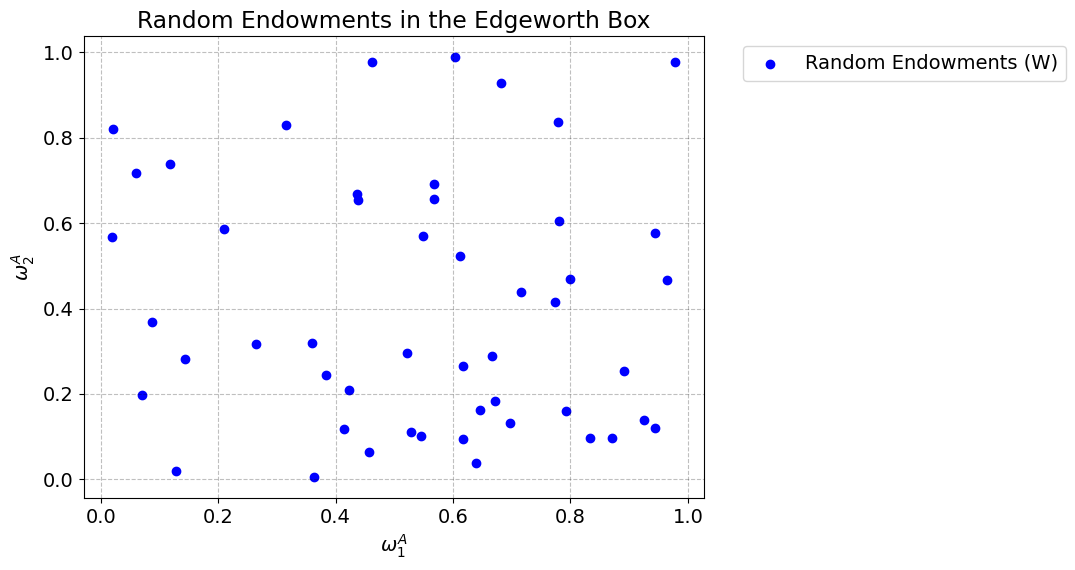

In [12]:
# Generating the random set W with 50 elements for ω1A and ω2A
np.random.seed(0)  # For reproducibility
omega_1A_samples = np.random.uniform(0, 1, 50)
omega_2A_samples = np.random.uniform(0, 1, 50)

# Plotting the random set W in the ω1A-ω2A space
plt.figure(figsize=(8, 6))
plt.scatter(omega_1A_samples, omega_2A_samples, c='blue', label='Random Endowments (W)')
plt.xlabel('$\omega_1^A$')
plt.ylabel('$\omega_2^A$')
plt.title('Random Endowments in the Edgeworth Box')
plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1.0))
plt.grid(True)
plt.show()

### 3.8. <a id='toc3_5_2_'></a>[Question 8](#toc0_)

In [13]:
# Function to find market-clearing price for given ωA
def find_market_clearing_price(omega_A):
    # Wrapper function for fsolve, assuming excess demand function is defined
    initial_guess = 1.0
    market_clearing_price = fsolve(excess_demand_good1, initial_guess, args=(omega_A, 1 - omega_A, alpha, beta))
    return market_clearing_price[0]


# Prepare to collect allocations for plotting
allocations_A = []
allocations_B = []

# Calculate allocations for each ωA in W
for w1A, w2A in zip(omega_1A_samples, omega_2A_samples):
    omega_A = np.array([w1A, w2A])
    p1 = find_market_clearing_price(omega_A)
    allocation_A = demand_A(p1, omega_A=omega_A)
    allocation_B = demand_B(p1, omega_B=1 - omega_A)
    allocations_A.append(allocation_A)
    allocations_B.append(allocation_B)

# Plotting in the Edgeworth Box
allocations_A = np.array(allocations_A)
allocations_B = np.array(allocations_B)

plt.figure(figsize=(8, 6))
plt.scatter(allocations_A[:, 0], allocations_A[:, 1], c='red', label='Allocations A', s=10)
plt.scatter(1 - allocations_B[:, 0], 1 - allocations_B[:, 1], c='blue', label='Allocations B', s=10)
plt.xlabel('$x_1^A$')

plt.ylabel('$x_2^A$')
plt.title('Market Equilibrium Allocations in the Edgeworth Box')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'excess_demand_good1' is not defined